In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [3]:
params_dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response] = {}

## Load France parameters and mobility_heat

In [4]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/thi_france_params_4SD_precip_sort.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_w_vars_90_4SD_precip.csv")



#### format variables for every year (as opposed to categorical), format binary variable for duration and coast

### make subset dataframe for every activity-type variable

In [5]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [6]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [7]:
df['variable'].unique()

array(['FP_Intercept_residential_difference',
       'FP_Intercept_workplaces_difference',
       'FP_Intercept_grocery_pharmacy_difference',
       'FP_Intercept_retail_difference', 'FP_Intercept_parks_difference',
       'FP_thi_centered_residential_difference',
       'FP_thi_centered_workplaces_difference',
       'FP_thi_centered_grocery_pharmacy_difference',
       'FP_thi_centered_retail_difference',
       'FP_thi_centered_parks_difference',
       'FP_thi_diff_residential_difference',
       'FP_thi_diff_workplaces_difference',
       'FP_thi_diff_grocery_pharmacy_difference',
       'FP_thi_diff_retail_difference', 'FP_thi_diff_parks_difference',
       'FP_rain_standard_heat_residential_difference',
       'FP_rain_standard_heat_workplaces_difference',
       'FP_rain_standard_heat_grocery_pharmacy_difference',
       'FP_rain_standard_heat_retail_difference',
       'FP_rain_standard_heat_parks_difference',
       'FP_rain_standard_control_residential_difference',
       'F

In [8]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [9]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





## Iterate through repsonses and states, create dictionary with intercepts and slopes

In [10]:
state = 'France'
for response in ['workplaces', 'residential', 'retail', 'parks', 'grocery_pharmacy']:
    params_dic[response][state] = get_average_effects(dic, response, state)


params_dic['transit'][state] = [0, 0]


In [11]:
params_dic

{'workplaces': {'France': [0.0055469288914842, -12.45456797644248]},
 'residential': {'France': [0.24254267084715, 3.0704354857426255]},
 'grocery_pharmacy': {'France': [-0.720906275613805, -3.550932502888629]},
 'retail': {'France': [-1.08292916170203, -4.008348409185754]},
 'parks': {'France': [-3.49982165731948, 37.11986204882406]},
 'transit': {'France': [0, 0]}}

## Load Brazil parameters and mobility_heat

In [12]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_brazil_params_4SD_precip_sort.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/brazil/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [13]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [14]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [15]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-3.086090,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.541080,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,0.004868,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.032166,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,-0.029029,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-2.762010,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,-1.041817,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,-1.004936,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.390017,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,0.083502,0,0,0,0,0,1


In [16]:
dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]



In [17]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [18]:
state='Brazil'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


## Load India parameters and mobility_heat

In [19]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_india_params_4SD_precip_sort.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [20]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [21]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [22]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]



In [23]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])


    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





### Add to params dic

In [24]:
state = 'India'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [25]:
params_dic

{'workplaces': {'France': [0.0055469288914842, -12.45456797644248],
  'Brazil': [-0.357968439516082, 2.143461975915904],
  'India': [-0.031401924119954, -5.506902827961573]},
 'residential': {'France': [0.24254267084715, 3.0704354857426255],
  'Brazil': [0.0200960178368083, -0.37020117672632813],
  'India': [0.0340746515242346, -0.36228118651199037]},
 'grocery_pharmacy': {'France': [-0.720906275613805, -3.550932502888629],
  'Brazil': [0.179308929242767, -0.775739749421866],
  'India': [-0.465565277061505, -5.447651097033234]},
 'retail': {'France': [-1.08292916170203, -4.008348409185754],
  'Brazil': [0.185806931540195, -0.21022167281564075],
  'India': [-0.47982486274331, -4.387935405622402]},
 'parks': {'France': [-3.49982165731948, 37.11986204882406],
  'Brazil': [-0.666562888494089, 0.48422901403529384],
  'India': [-0.43266018753368, 7.204647400761602]},
 'transit': {'France': [0, 0],
  'Brazil': [-0.54107950085685, 0.017167972786643837],
  'India': [-0.276386165623031, 2.902725

## Load US parameters and mobility_heat

In [26]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_united_states_params_4SD_precip_sort.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/united_states/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [27]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [28]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [29]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]






In [30]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-2.183644,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.087548,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,0.045184,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.032737,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,0.026158,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-0.997804,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,1.210811,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,0.016979,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.116943,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,-0.107949,0,0,0,0,0,1


In [31]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [32]:
state = 'United States'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [33]:
params_dic

{'workplaces': {'France': [0.0055469288914842, -12.45456797644248],
  'Brazil': [-0.357968439516082, 2.143461975915904],
  'India': [-0.031401924119954, -5.506902827961573],
  'United States': [0.0374450804938204, -1.7517910592900638]},
 'residential': {'France': [0.24254267084715, 3.0704354857426255],
  'Brazil': [0.0200960178368083, -0.37020117672632813],
  'India': [0.0340746515242346, -0.36228118651199037],
  'United States': [0.043987487636023, 1.3641618630330365]},
 'grocery_pharmacy': {'France': [-0.720906275613805, -3.550932502888629],
  'Brazil': [0.179308929242767, -0.775739749421866],
  'India': [-0.465565277061505, -5.447651097033234],
  'United States': [-0.245621873238552, 0.392121394837511]},
 'retail': {'France': [-1.08292916170203, -4.008348409185754],
  'Brazil': [0.185806931540195, -0.21022167281564075],
  'India': [-0.47982486274331, -4.387935405622402],
  'United States': [-0.123404803436671, -0.8406521447913746]},
 'parks': {'France': [-3.49982165731948, 37.119862

## Load turkey parameters and mobility_heat

In [34]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_turkey_params_4SD_precip_sort.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/turkey/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [35]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]


In [36]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [38]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'grocery_pharmacy', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [39]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    print(global_int)
    print(variable_sum)
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [40]:
state = 'Turkey'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks', 'transit']:
    params_dic[response][state] = get_average_effects(dic, response, state)



7.77291947751548
-6.439638448758321
1.03566671711807
-1.0341957546328722
-5.55339567272713
8.608835501558692
-0.840690627354414
3.398405622367933
-15.7959531808683
16.904049104419123
-8.81112011071414
8.804072824318729


In [41]:
params_dic['transit']

{'France': [0, 0],
 'Brazil': [-0.54107950085685, 0.017167972786643837],
 'India': [-0.276386165623031, 2.9027257329453615],
 'United States': [-0.0875484792208937, -0.9004205769543425],
 'Turkey': [-0.245666709319137, -0.0070472863954123]}

## Load Nigeria parameters and mobility_heat

In [71]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_nigeria_params_4SD_precip_sort.csv")

df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/nigeria/THI_mobility_heat_w_vars_90_4SD_precip.csv")



In [72]:
df

,variable,estimate
0,FP_Intercept_residential_difference,5.702895
1,FP_Intercept_workplaces_difference,19.572533
2,FP_Intercept_grocery_pharmacy_difference,12.096317
3,FP_Intercept_retail_difference,16.603750
4,FP_thi_centered_residential_difference,-0.034111
5,FP_thi_centered_workplaces_difference,0.830776
6,FP_thi_centered_grocery_pharmacy_difference,-1.424762
7,FP_thi_centered_retail_difference,0.099182
8,FP_temp_diff_residential_difference,0.133296
9,FP_temp_diff_workplaces_difference,-0.116115


### make subset dataframe for every activity-type variable

In [73]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]

In [74]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()

### Format params into dataframe

In [75]:
transit

,index,variable,estimate,workplaces,residential,retail,transit
0,2,FP_Intercept_transit_difference,35.107242,0,0,0,1
1,6,FP_thi_centered_transit_difference,0.925347,0,0,0,1
2,10,FP_temp_diff_transit_difference,-0.124846,0,0,0,1
3,14,FP_rain_standard_heat_transit_difference,-0.112603,0,0,0,1
4,18,FP_rain_standard_control_transit_difference,-0.139735,0,0,0,1
5,22,FP_stage_frac_transit_difference,-3.413857,0,0,0,1
6,26,FP_weekend1_transit_difference,-6.074498,0,0,0,1
7,30,FP_heatwave_durTrue_transit_difference,-3.130850,0,0,0,1
8,34,FP_popden_dec_transit_difference,-0.821765,0,0,0,1
9,38,FP_coast1_transit_difference,0.251943,0,0,0,1


In [79]:
dic = {}
for response in ['workplaces', 'residential', 'retail', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['stage_frac'] = subset.iloc[5,2]
    dic[response]['weekend'] = subset.iloc[6,2]
    dic[response]['heatwave_dur'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['coast'] = subset.iloc[9,2]



In [80]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [81]:
state = 'Nigeria'
for response in ['workplaces', 'residential',  'retail', 'grocery_pharmacy']:
    params_dic[response][state] = get_average_effects(dic, response, state)

params_dic['parks'][state] = [0, 0]
params_dic['transit'][state] = [0, 0]




In [82]:
params_dic['transit']

{'France': [0, 0],
 'Brazil': [-0.54107950085685, 0.017167972786643837],
 'India': [-0.276386165623031, 2.9027257329453615],
 'United States': [-0.0875484792208937, -0.9004205769543425],
 'Turkey': [-0.245666709319137, -0.0070472863954123],
 'Nigeria': [0, 0]}

In [83]:
concat = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD.csv")


In [84]:
france = concat[concat['adm0'] == 'France']
brazil = concat[concat['adm0'] == 'Brazil']
india = concat[concat['adm0'] == 'India']
united_states = concat[concat['adm0'] == 'United States']
united_states = united_states[united_states['adm1'] != 'Alaska']

turkey = concat[concat['adm0'] == 'Turkey']

nigeria = concat[concat['adm0'] == 'Nigeria']




In [85]:
def plot_regression(response, params_dic):
    
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)

    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    
    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)

    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = ax.get_position()
    
    
    #min_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).min() 
    #max_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).max() 


    plt.plot(x_axis + brazil['thi_heat'].mean(), br_y_axis, label='Brazil', color='green')
    plt.plot(x_axis + france['thi_heat'].mean(), fr_y_axis, label='France', color='blue')
    plt.plot(x_axis + india['thi_heat'].mean(), in_y_axis, label='India', color='orange')
    plt.plot(x_axis + turkey['thi_heat'].mean(), tu_y_axis, label='Turkey', color='red')
    plt.plot(x_axis + united_states['thi_heat'].mean(), us_y_axis, label='United States', color='black')
    plt.plot(x_axis + nigeria['thi_heat'].mean(), ng_y_axis, label='Nigeria', color='purple')



    
    #plt.vlines(x=BC_temp, ymin=min_y, ymax=max_y, colors='purple', ls='--', lw=1, label='BC mean heatwave')
    #plt.vlines(x=WA_temp, ymin=min_y, ymax=max_y, colors='green', ls='--', lw=1, label='WA mean heatwave')
    #plt.vlines(x=OR_temp, ymin=min_y, ymax=max_y, colors='orange', ls='--', lw=1, label='OR mean heatwave')
    #plt.vlines(x=CA_temp, ymin=min_y, ymax=max_y, colors='red', ls='--', lw=1, label='CA mean heatwave')
    
    plt.title(f"Percent change in {response} activity with heat wave temperature")
    plt.xlabel(f"Heat wave temperature (C)")
    plt.ylabel(f"Percent change in mobility")
    plt.tight_layout()
    #ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    plt.legend()
    #plt.savefig(data_path + f'paper2/results/reg_plots/{response}.png', dpi=400)


    plt.show()

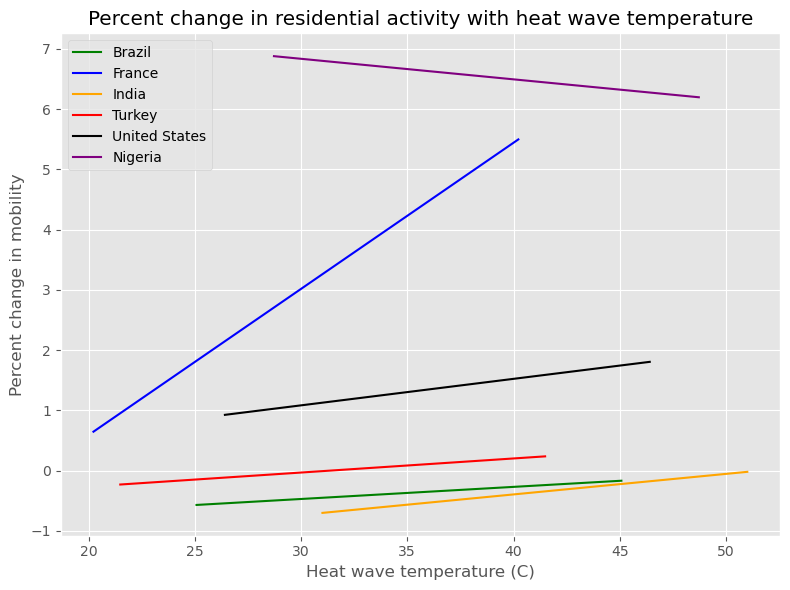

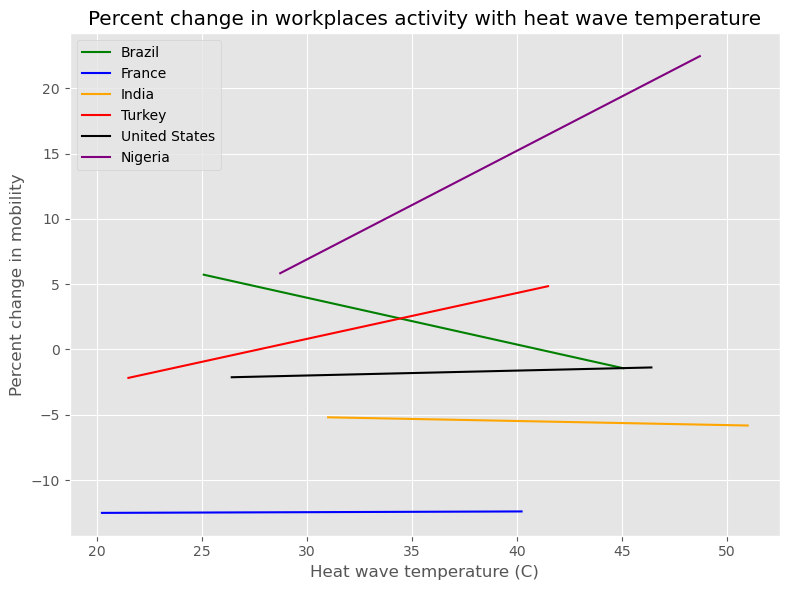

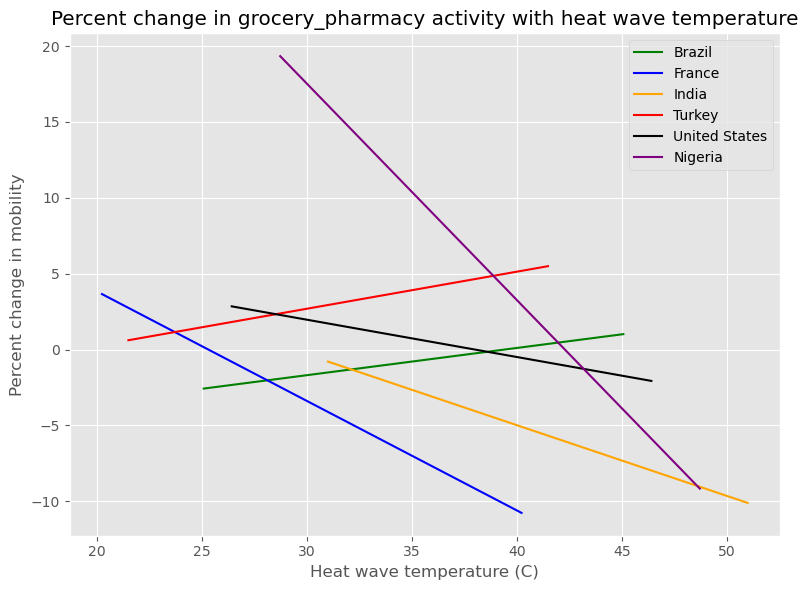

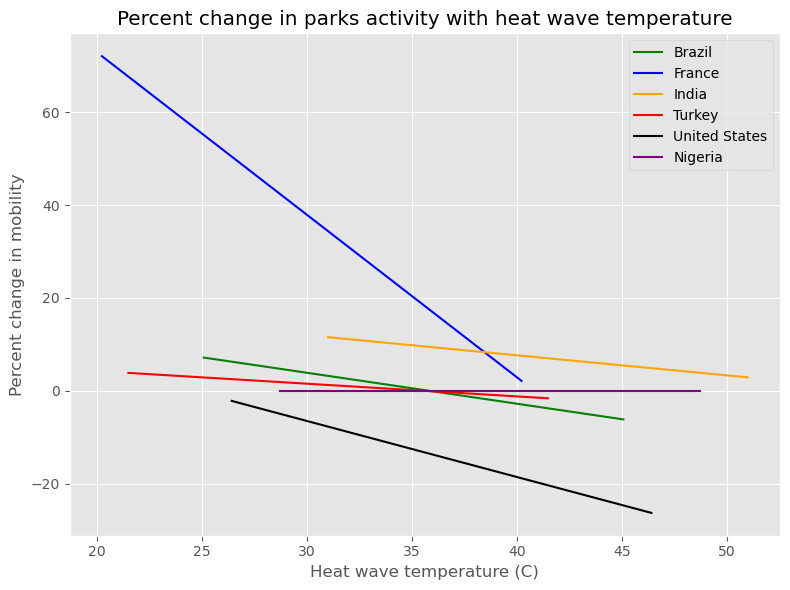

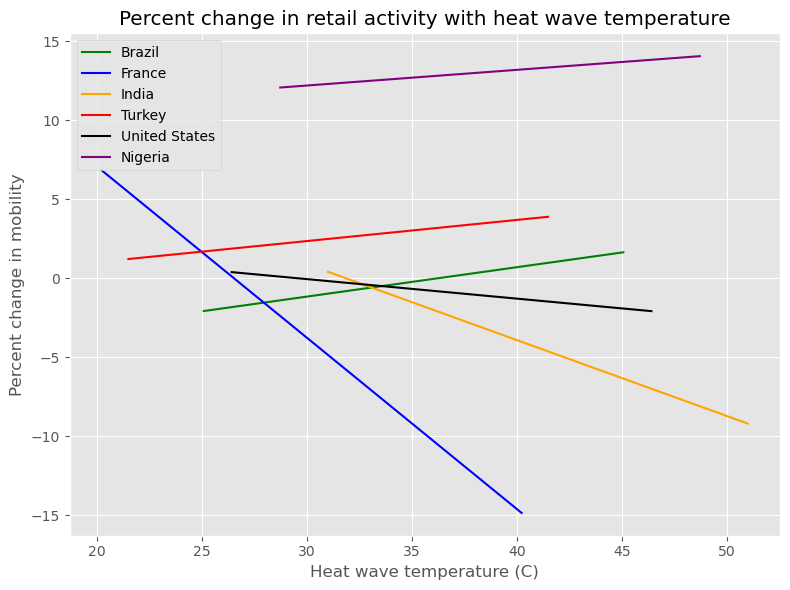

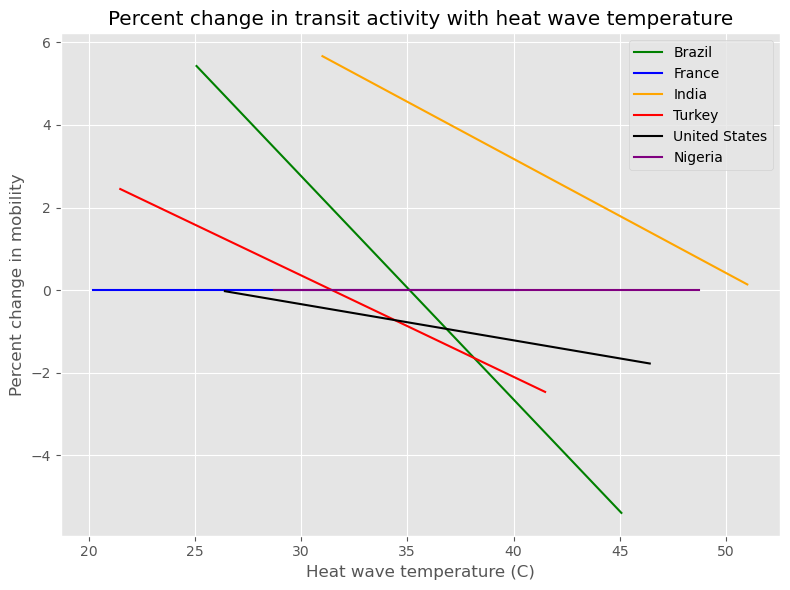

In [86]:
plot_regression('residential', params_dic)
plot_regression('workplaces', params_dic)
plot_regression('grocery_pharmacy', params_dic)
plot_regression('parks', params_dic)
plot_regression('retail', params_dic)
plot_regression('transit', params_dic)


### Create function which gathers average effects for each state into a dataframe

In [87]:
master = pd.DataFrame()
for response in ['residential', 'workplaces', 'transit', 'grocery_pharmacy', 'retail', 'parks']:
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)


    
    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)
    
    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    br = pd.DataFrame(br_x_axis, br_y_axis)
    fr = pd.DataFrame(fr_x_axis, fr_y_axis) 
    ind = pd.DataFrame(in_x_axis, in_y_axis)
    tu = pd.DataFrame(tu_x_axis, tu_y_axis)
    us = pd.DataFrame(us_x_axis, us_y_axis)
    ng = pd.DataFrame(ng_x_axis, ng_y_axis)


    br['state'] = 'Brazil'
    fr['state'] = 'France'
    ind['state'] = 'India'
    tu['state'] = 'Turkey'
    us['state'] = 'United States'
    ng['state'] = 'Nigeria'



    br.reset_index(inplace=True)
    fr.reset_index(inplace=True)
    ind.reset_index(inplace=True)
    tu.reset_index(inplace=True)
    us.reset_index(inplace=True)
    ng.reset_index(inplace=True)



    df = pd.concat([br, fr, ind, tu, us, ng])
    df['response'] = response
    
    master = pd.concat([master, df])

In [88]:
master.columns = ['change', 'temp', 'adm0', 'response']

In [89]:
master[master['change'] == 0]

,change,temp,adm0,response
0,0.0,22.209520,France,transit
1,0.0,23.037058,France,transit
2,0.0,23.864597,France,transit
3,0.0,24.692135,France,transit
4,0.0,25.519673,France,transit
5,0.0,26.347212,France,transit
6,0.0,27.174750,France,transit
7,0.0,28.002289,France,transit
8,0.0,28.829827,France,transit
9,0.0,29.657365,France,transit


In [90]:

master = master[(master['adm0'] != 'Nigeria') | (master['response'] != 'parks')]
master = master[(master['adm0'] != 'Nigeria') | (master['response'] != 'transit')]

master = master[(master['adm0'] != 'France') | (master['response'] != 'transit')]



In [91]:
#save dataframe to re-create plots in R
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip_sort.csv')

In [108]:
master = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip_sort.csv')

In [109]:
dic = {}
dic['Brazil'] = {}
dic['Brazil']['residential'] = 0.20733
dic['Brazil']['workplaces'] = 0.93512
dic['Brazil']['transit'] = 2.55608
dic['Brazil']['grocery_pharmacy'] = 1.84149
dic['Brazil']['retail'] = 1.50338
dic['Brazil']['parks'] = 3.09539


dic['United States'] = {}
dic['United States']['residential'] = 0.10037
dic['United States']['workplaces'] = 0.19197
dic['United States']['transit'] = 0.71943
dic['United States']['grocery_pharmacy'] = 0.36935
dic['United States']['retail'] = 0.35331
dic['United States']['parks'] = 2.82143


dic['France'] = {}
dic['France']['residential'] = 0.66964
dic['France']['workplaces'] = 2.31064
dic['France']['grocery_pharmacy'] = 4.18235
dic['France']['retail'] = 3.99450
dic['France']['parks'] = 19.56461


dic['Nigeria'] = {}
dic['Nigeria']['residential'] = 1.33275
dic['Nigeria']['workplaces'] = 3.07927
dic['Nigeria']['grocery_pharmacy'] = 6.57708
dic['Nigeria']['retail'] = 9.56617


dic['Turkey'] = {}
dic['Turkey']['residential'] = 0.34058
dic['Turkey']['workplaces'] = 1.23114
dic['Turkey']['transit'] = 3.19831
dic['Turkey']['grocery_pharmacy'] = 2.40546
dic['Turkey']['retail'] = 2.07925
dic['Turkey']['parks'] = 4.20899

dic['India'] = {}
dic['India']['residential'] = 0.19659
dic['India']['workplaces'] = 1.06481
dic['India']['transit'] = 1.24175
dic['India']['grocery_pharmacy'] = 1.86029
dic['India']['retail'] = 1.23969
dic['India']['parks'] = 2.08440


In [110]:
se_df = pd.DataFrame(dic).unstack().reset_index()

In [111]:
se_df.columns = ['adm0', 'response', 'SE']

In [112]:
se_df = se_df[(se_df['adm0'] != 'Nigeria') | (se_df['response'] != 'parks')]
se_df = se_df[(se_df['adm0'] != 'Nigeria') | (se_df['response'] != 'transit')]
se_df = se_df[(se_df['adm0'] != 'France') | (se_df['response'] != 'transit')]

In [113]:
master = master.merge(se_df, on=['adm0', 'response'], how='left')

In [114]:
master.head()

,Unnamed: 0,change,temp,adm0,response,SE
0,0,-0.571161,27.170034,Brazil,residential,0.20733
1,1,-0.550008,27.921305,Brazil,residential,0.20733
2,2,-0.528854,28.672575,Brazil,residential,0.20733
3,3,-0.507700,29.423845,Brazil,residential,0.20733
4,4,-0.486547,30.175115,Brazil,residential,0.20733


In [115]:
master['lower_ci'] = master['change'] - (master['SE'] * 1.96)
master['upper_ci'] = master['change'] + (master['SE'] * 1.96)

In [116]:
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_CI_sort.csv')

In [101]:
master[(master['adm0'] == 'Nigeria') & (master['response'] == 'workplaces')]

,Unnamed: 0,change,temp,adm0,response,SE,lower_ci,upper_ci
220,0,5.837329,30.836104,Nigeria,workplaces,3.08765,-0.214465,11.889123
221,1,6.711830,31.389163,Nigeria,workplaces,3.08765,0.660036,12.763624
222,2,7.586332,31.942222,Nigeria,workplaces,3.08765,1.534538,13.638126
223,3,8.460833,32.495280,Nigeria,workplaces,3.08765,2.409039,14.512627
224,4,9.335334,33.048339,Nigeria,workplaces,3.08765,3.283540,15.387128
225,5,10.209835,33.601398,Nigeria,workplaces,3.08765,4.158041,16.261629
226,6,11.084337,34.154457,Nigeria,workplaces,3.08765,5.032543,17.136131
227,7,11.958838,34.707515,Nigeria,workplaces,3.08765,5.907044,18.010632
228,8,12.833339,35.260574,Nigeria,workplaces,3.08765,6.781545,18.885133
229,9,13.707840,35.813633,Nigeria,workplaces,3.08765,7.656046,19.759634
